# **MSP Projekt 2022**
### Daša Nosková - xnosko05
##### Piatok 10:00 


In [2]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats.gof as smg
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import normal_ad
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math
import scipy.stats as sp
import statsmodels.discrete.discrete_model as dm
import pandas as pd

# Úloha 1

IDK ASI ANOVA na posledne jednofaktorova podla mesta \\
a na prve test dobrej zhody
Hypotéza: p1 = p2 = ... = pk = p ku HA: Ej, pj != p

In [3]:
alpha = 0.05
data = {'zimni': [510,324,302,257,147,66,87,9], 'letni': [352,284,185,178,87,58,65,30],
        'striedanie':[257,178,124,78,44,33,31,20], 'jedno': [208,129,70,74,6,19,32,7], }

df = pd.DataFrame.from_dict(data, orient='index', columns=['Praha', 'Brno', 'Znojmo',
                            'Tišnov', 'Paseky', 'Horní Lomná','Dolní Věstonice','Okolí' ])
print(df)

            Praha  Brno  Znojmo  Tišnov  Paseky  Horní Lomná  Dolní Věstonice  \
zimni         510   324     302     257     147           66               87   
letni         352   284     185     178      87           58               65   
striedanie    257   178     124      78      44           33               31   
jedno         208   129      70      74       6           19               32   

            Okolí  
zimni           9  
letni          30  
striedanie     20  
jedno           7  


a) V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují zimní čas \
b) V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují letní čas. \
c) V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují střídání času.

In [5]:
k = 8
p = 1/k

def test_dobrej_zhody(df, p):
    n = df.loc['ni'].sum(axis=0) # n 
    df.loc['p_i'] = df.loc['ni']/n # skutocna pravdepodobnost
    df.loc['p_t'] = p # teoreticka pravdepodobnost
    df.loc['n_t'] = n*p # teoreticka cetnost
    (chis,pval) = sp.chisquare(df.loc['ni'], df.loc['n_t']) # vypocet chi**2
    return chis

chi_square_alpha = sp.chi2.ppf(1-alpha,k-1)

print(f'Doplnok kritickeho oboru: {[0,chi_square_alpha]}')
print('A) V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují zimní čas')
H_A = test_dobrej_zhody( df.loc[['zimni']].rename(index={'zimni':'ni'}), p )
print(f'Chi2: {H_A}')
print(f'Hypotezu zamietame: {H_A>chi_square_alpha}')
print('B) V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují letní čas.')
H_B = test_dobrej_zhody(df.loc[['letni']].rename(index={'letni':'ni'}), p )
print(f'Chi2: {H_B}')
print(f'Hypotezu zamietame: {H_B>chi_square_alpha}')
print('C) V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují striedanie času.')
H_C = test_dobrej_zhody(df.loc[['striedanie']].rename(index={'striedanie':'ni'}), p )
print(f'Chi2: {H_C }')
print(f'Hypotezu zamietame: {H_C >chi_square_alpha}')

Doplnok kritickeho oboru: [0, 14.067140449340169]
A) V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují zimní čas
Chi2: 911.132784958872
Hypotezu zamietame: True
B) V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují letní čas.
Chi2: 611.0532687651332
Hypotezu zamietame: True
C) V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují striedanie času.
Chi2: 527.3294117647059
Hypotezu zamietame: True


#### Pre nasledujúce hypotézy, je potrebné vytvoriť z existujúcich tried, nové triedy a to, triedy vačšie mestá, menšie mestá a obce.
d) U větších měst, menších měst a obcí (3. průzkumy) je stejné procentuální zastoupení obyvatel, co preferují zimní čas. \
e) U větších měst, menších měst a obcí (3. průzkumy) je stejné procentuální zastoupení nerozhodnutelných obyvatel. \

In [7]:
k = 3
p = 1/k
df['vacsie mesta'] = df['Praha'] + df['Brno']
df['mensie mesta'] = df['Znojmo'] + df['Tišnov']
df['obce'] = df['Paseky'] + df['Horní Lomná'] + df['Dolní Věstonice']

df2 = df[['vacsie mesta','mensie mesta','obce']]

chi_square_alpha = sp.chi2.ppf(1-alpha,k-1)

print(f'Doplnok kritickeho oboru: {[0,chi_square_alpha]}')
print('D) U větších měst, menších měst a obcí (3. průzkumy) je stejné procentuální zastoupení obyvatel, co preferují zimní čas.')
H_d = test_dobrej_zhody(df2.loc[['zimni']].rename(index={'zimni':'ni'}), p )
print(f'Chi2: {H_d}')
print(f'Hypotezu zamietame: {H_d>chi_square_alpha}')
print('E) U větších měst, menších měst a obcí (3. průzkumy) je stejné procentuální zastoupení nerozhodnutelných obyvatel.')
H_e = test_dobrej_zhody(df2.loc[['jedno']].rename(index={'jedno':'ni'}), p )
print(f'Chi2: {H_e}')
print(f'Hypotezu zamietame: {H_e>chi_square_alpha}')

Doplnok kritickeho oboru: [0, 5.991464547107979]
D) U větších měst, menších měst a obcí (3. průzkumy) je stejné procentuální zastoupení obyvatel, co preferují zimní čas.
Chi2: 252.72415829887774
Hypotezu zamietame: True
E) U větších měst, menších měst a obcí (3. průzkumy) je stejné procentuální zastoupení nerozhodnutelných obyvatel.
Chi2: 229.02973977695171
Hypotezu zamietame: True


#### Na nasledujúcu hypotézu bude použitá ANOVA
f) Na základě odpovědí z okolí studenta zkuste určit z dat, zda student prováděl výzkum ve větším městě, menším městě nebo
v obci. Porovnejte výsledek se skutečností a okomentujte 

In [32]:
df_a = df[['vacsie mesta','Okolí']]
def chi_test(a,b):
    a = a.squeeze()
    b = b.squeeze()
    n = a.values.sum() # n 
    n += b.values.sum()
    diff = ((b-a)**2)/a
    return diff.values.sum()

print(chi_test(df[['vacsie mesta']], df[['Okolí']]))
print(chi_test(df[['mensie mesta']], df[['Okolí']]))
print(chi_test(df[['obce']], df[['Okolí']]))


2112.577157465138
1140.9447162505728
552.119067112225


# Úloha 2
regresny model sa da zapisat v tvare Y = XB + e.

In [664]:
# data
Z = np.array([-24.62, -17.71, 15.57, 104.46, 22.48, 82.45, 121.34,
              76.68, 110.89, 93.31, 35.83, 87.97, 79.37, 138.35,
              -20.46, 74.53, 74.86, 94.28, 180.71, 101.12, 271.9, 203.8,
              -14.6, 115.39, 156.48, 189.47, 124.65, 366.66, 206.78,
              93.54, 189.22, 201.91, 304.64, 202.01, 367.64, 254.81,
              226.32, 346.02, 390.5, 444.94, 392.08, 424.95, 427.82,
              361.1, 454.58, 515.45, 443.66, 535.12, 551.86, 585.76,
              624.78, 559.12, 571.72, 589.11, 622.54, 706.7, 687.63,
              691.85, 703.73, 751.03, 789.6, 804.41, 806.21, 828.83,
              815.46, 987.89, 856.17, 894.29, 923.28, 940.97])

X = np.array([0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 2.22, 
              2.22, 2.22, 2.22, 2.22, 2.22, 2.22,
              4.44, 4.44, 4.44, 4.44, 4.44, 4.44, 4.44,
              6.67, 6.67, 6.67, 6.67, 6.67, 6.67, 6.67,
              8.89, 8.89, 8.89, 8.89, 8.89, 8.89, 8.89,
              11.11, 11.11, 11.11, 11.11, 11.11, 11.11, 11.11,
              13.33, 13.33, 13.33, 13.33, 13.33, 13.33, 13.33,
              15.56, 15.56, 15.56, 15.56, 15.56, 15.56, 15.56,
              17.78, 17.78, 17.78, 17.78, 17.78, 17.78, 17.78,
              20.00, 20.00, 20.00, 20.00, 20.00, 20.00, 20.00,
              ])

Y = np.array([0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00,
              1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67,
              3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33,
              5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00,
              6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67,
              8.33,10.00,0.00,1.67,3.33,5.00,6.67,8.33,10.00,
              0.00,1.67, 3.33,5.00,6.67,8.33,10.00,0.00,1.67,
              3.33,5.00,6.67,8.33,10.00,0.00,1.67,3.33,5.00,
              6.67,8.33,10.00,
              ])

xx = np.linspace(np.min(X)-5, np.max(X)+5, 70)
yy = np.linspace(np.min(Y)-5, np.max(Y)+5, 70)
zz = np.linspace(np.min(Z)-5, np.max(Z)+5, 70)

alpha = 0.05
models = {}

In [665]:
def create_model(*params, show_summary=True, use_constant=True):
    F = np.column_stack((params))
    if use_constant:
        F = sm.add_constant(F)
    model = sm.OLS(Z, F).fit()
    if show_summary:
        print(model.summary())
    return model

def predict(model, *params, use_constant=True):
    predict_values = np.column_stack((params))
    if use_constant:
        predict_values = sm.add_constant(predict_values)
    z_prediction = model.predict(predict_values)
    z_prediction=np.expand_dims(z_prediction,axis=0)
    return z_prediction

def plot_z(ax, X,Y,Z, label=None, color='blue', alpha=0.5):
    z = ax.scatter(X, Y, Z, color=color, alpha=alpha)
    z.set_label(label)
    ax.view_init(10, 110)

def plot_surface(ax, xx,yy, z_prediction):
    x_surf, y_surf = np.meshgrid(xx, yy)
    fig = ax.plot_wireframe(x_surf,y_surf,z_prediction, color='green', alpha=0.2,rstride=10, cstride=10,)
    fig.set_label('Predicted surface')

def plot_model(model, z_prediction):
    fig = plt.figure(figsize=(10, 10), dpi=100, layout='tight')
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title('Model')
    plot_surface(ax, X,Y, z_prediction)
    plot_z(ax,X,Y,Z, label='z', color='red', alpha=0.5)
    plot_z(ax, X,Y, z_prediction, label='predicted z', color='blue', alpha=0.3)

    ax.legend(loc="best")
    fig.show()

def regression(*model_params, show_summary=True, use_constant=True, plot=True):
    model = create_model(*model_params, show_summary=show_summary, use_constant=use_constant)
    z_prediction = predict(model,*model_params,use_constant=use_constant)
    if plot:
        plot_model(model, z_prediction)
    return model

## model Z = B1 + B2X + B3Y + B4X^2 + B5Y^2 + B6XY  
Střední hodnota chybové složky je 0
2.Správně specifikovaný model– tedy rovnice modelu je správně vybrána
3.Chybová složka má konstantní rozptyl (pro každé pozorování má příslušná složka vektoru E stejný rozptyl)
4.Jednotlivé složky chybového vektoru jsou nekorelované
5.Rozdělení chyb je normální
Hladame Mep a AIC minimalne a R2 maximalne.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     411.6
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           3.04e-47
Time:                        13:52:26   Log-Likelihood:                -373.91
No. Observations:                  70   AIC:                             759.8
Df Residuals:                      64   BIC:                             773.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.3910     25.298     -0.529      0.5

/tmp/ipykernel_5401/3397836032.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


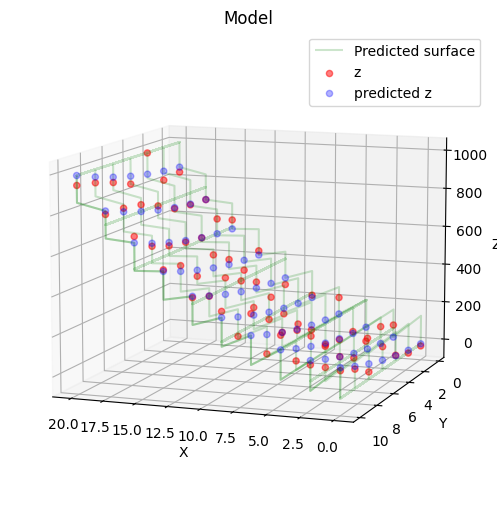

In [666]:

modelB6 = regression(*(X,Y,X**2,Y**2,Y*X))
models['B6']=modelB6

## model Z = B1 + B2X + B3Y + B4X^2 + B5Y^2  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     521.9
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           1.29e-48
Time:                        13:52:27   Log-Likelihood:                -373.95
No. Observations:                  70   AIC:                             757.9
Df Residuals:                      65   BIC:                             769.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4663     20.337     -0.465      0.6

/tmp/ipykernel_5401/3397836032.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


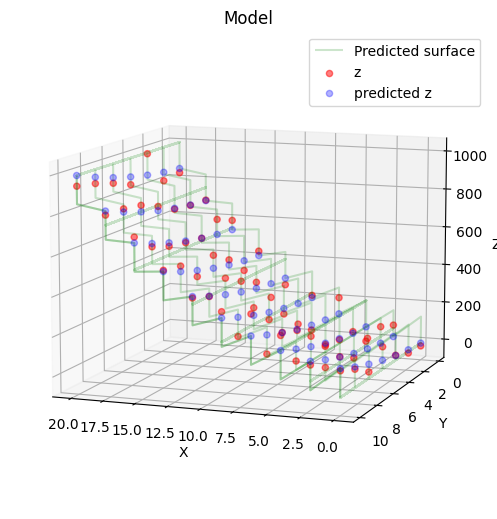

In [667]:
model_params = lambda x,y : (x,y,x**2,y**2)
modelB5 = regression(*(X,Y,X**2,Y**2))
models['B5']=modelB5

## model Z = B1 + B2X + B3Y + B4X^2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     678.6
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           1.62e-49
Time:                        13:52:27   Log-Likelihood:                -375.33
No. Observations:                  70   AIC:                             758.7
Df Residuals:                      66   BIC:                             767.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.0729     18.429     -1.306      0.1

/tmp/ipykernel_5401/3397836032.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


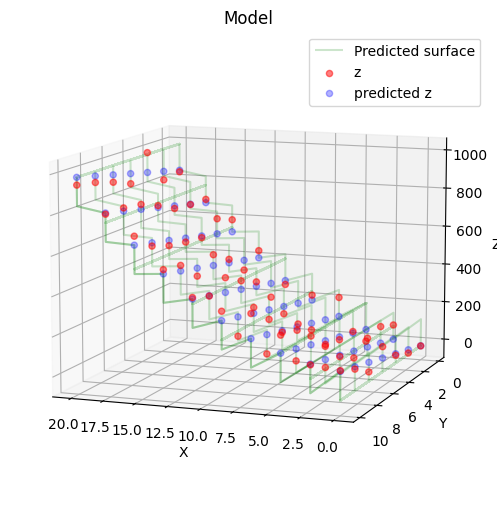

In [668]:

modelB4 = regression(*(X,Y,X**2))
models['B4']=modelB4

## model Z = B1 + B2X + B3Y

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     379.3
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           2.90e-37
Time:                        13:52:28   Log-Likelihood:                -408.56
No. Observations:                  70   AIC:                             823.1
Df Residuals:                      67   BIC:                             829.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -131.2278     24.189     -5.425      0.0

/tmp/ipykernel_5401/3397836032.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


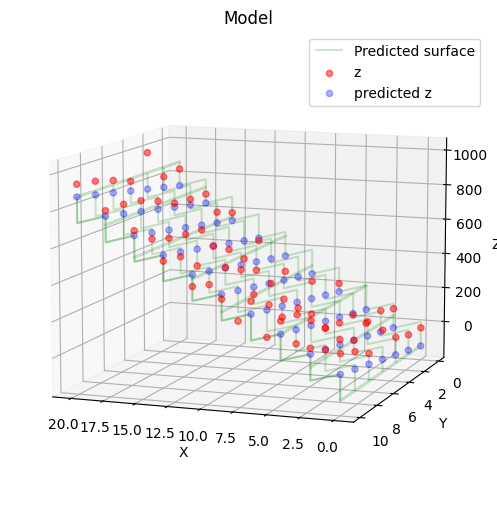

In [669]:

modelB3 = regression(*(X,Y))
models['B3']=modelB3


## model Z = B1 + B2X

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     564.3
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           1.21e-34
Time:                        13:52:28   Log-Likelihood:                -418.41
No. Observations:                  70   AIC:                             840.8
Df Residuals:                      68   BIC:                             845.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -60.3156     21.506     -2.805      0.0

/tmp/ipykernel_5401/3397836032.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


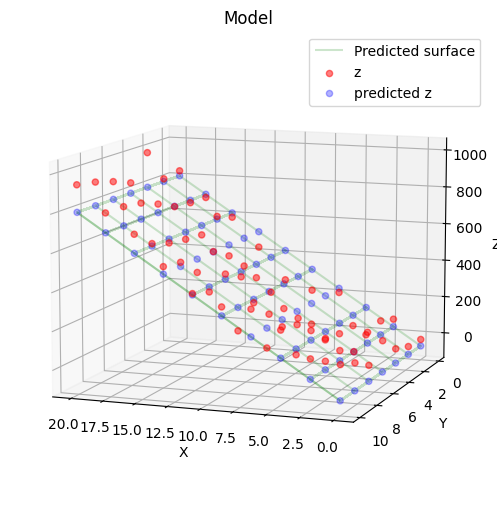

In [670]:
modelB2 = regression((X))
models['B2']=modelB2

## model Z = B1

/tmp/ipykernel_5401/3397836032.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


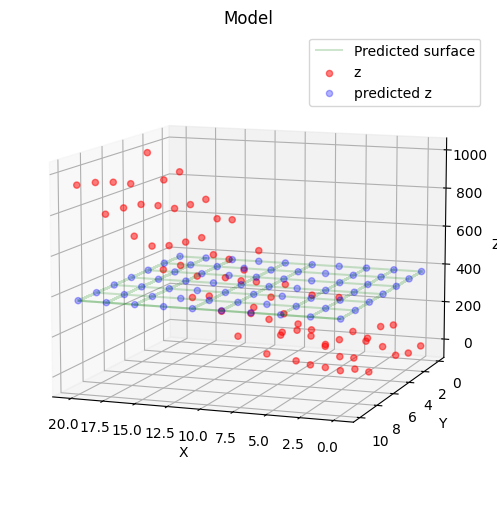

In [671]:
F = np.ones_like(X) # vector with ones
modelB1 = sm.OLS(Z, F).fit()
#print(modelB1.summary())
z_prediction = modelB1.predict(F)
z_prediction=np.expand_dims(z_prediction,axis=0)
plot_model(modelB1, z_prediction)
models['B1']=modelB1

# Porovnanie výsledkov modelov
### Koeficienty determinace

In [672]:

for k, model in models.items():
    print(f"Model {k}: { model.rsquared}")

Model B6: 0.9698382643056537
Model B5: 0.9698053251584066
Model B4: 0.9685971204437828
Model B3: 0.9188413040687706
Model B2: 0.892454843670285
Model B1: -2.220446049250313e-16


### Regresná diagnostika

In [673]:
#fig, axes = plt.subplots(nrows=2, ncols=3)
z_avg = np.mean(Z)
for k, model in models.items():
    print(f'Model {k}:')
    #Normality of the residuals Jarque Bearov test
    #sm.qqplot(model.resid, dist=sp.distributions.norm,loc=0, line="45")

    #Autokorelace Durbin-Watsonův test
    dw = sms.durbin_watson(model.resid)
    print(f"Durbin-Watson: {dw}")

    #Heteroskedasticita test
    CW = np.sum((Z - z_avg)*model.resid**2)**2/(2*model.mse_resid**2*np.sum((Z-z_avg)**2))
    print(f'Heteroskedasticita: {CW>=sp.chi2.ppf(alpha,1)}')
    

Model B6:
Durbin-Watson: 2.143661119593539
Heteroskedasticita: True
Model B5:
Durbin-Watson: 2.141182267200872
Heteroskedasticita: True
Model B4:
Durbin-Watson: 2.1409384743941753
Heteroskedasticita: True
Model B3:
Durbin-Watson: 0.866970243896377
Heteroskedasticita: True
Model B2:
Durbin-Watson: 1.0341431451086136
Heteroskedasticita: True
Model B1:
Durbin-Watson: 0.08105151481275066
Heteroskedasticita: True


### Záver porovnania modelov
Ako je vidieť vyššie, koeficienty determinace sú najvyššie pre modely B6, B5 a B4. Tieto modely najlepšie vystihujú dáta aj podľa vyššie zobrazených grafov. B5 a B4 sú submodelom B6.

Overíme hypotézy, že model B6 môžme zjednodušiť postupným testovaním parametrov modelu na 0.
 
Hypotézy pre model Z = B1 + B2X + B3Y + B4X^2 + B5Y^2 + B6XY :
1. H: B6 = 0 HA: B6 != 0
2. H: B5 = 0 HA: B5 != 0
3. H: B4 = 0 HA: B4 != 0

In [674]:
def test_hypotesis_parameter_eq_to_zero(model, range):
    W_alpha_bar = [-sp.t.ppf(1-alpha/2, model.df_resid), sp.t.ppf(1-alpha/2, model.df_resid)]
    print(f'Doplnok kritickeho oboru: {W_alpha_bar}')
    for i in range:
        print(f'\nH: B{i} = 0 HA: B{i} != 0')
        t = model.tvalues[i-1] # ~ (bj - 0 / s*sqrt(vjj)), V = H_inverse
        t_in = "t ∈ W_alpha_bar" if t >= W_alpha_bar[0] and t <= W_alpha_bar[1] else 't ∉ W_alpha_bar'
        print(f'Testovacie kriterium t: {t}')
        print(t_in)

test_hypotesis_parameter_eq_to_zero(modelB6,range(6,0,-1))

Doplnok kritickeho oboru: [-1.9977296536259734, 1.9977296536259734]

H: B6 = 0 HA: B6 != 0
Testovacie kriterium t: -0.26437354700664345
t ∈ W_alpha_bar

H: B5 = 0 HA: B5 != 0
Testovacie kriterium t: 1.6011502410485747
t ∈ W_alpha_bar

H: B4 = 0 HA: B4 != 0
Testovacie kriterium t: 10.275045417631738
t ∉ W_alpha_bar

H: B3 = 0 HA: B3 != 0
Testovacie kriterium t: 0.597570979109096
t ∈ W_alpha_bar

H: B2 = 0 HA: B2 != 0
Testovacie kriterium t: 1.8451770649795383
t ∈ W_alpha_bar

H: B1 = 0 HA: B1 != 0
Testovacie kriterium t: -0.5293246801485443
t ∈ W_alpha_bar


## Submodel 
Z výsledkov vidieť, že jedine parameter B4 nepatrí do doplnku kritického oboru, a teda hypotézu, B4 = 0 zamietame a vyberieme model Z = B1 + B2X + B3Y + B4X^2 za submodel B6. Kedže pre ostatné parametre, hypotézy nezamietame, môžme predpokladať že by sme ich mohli vynechať, lebo sú rovné 0. 
#### Otestujeme hypotezy pre nulovost parametrov aj pre model B4.

In [675]:

test_hypotesis_parameter_eq_to_zero(modelB4,range(4,0,-1))

Doplnok kritickeho oboru: [-1.9965644183594744, 1.9965644183594744]

H: B4 = 0 HA: B4 != 0
Testovacie kriterium t: 10.226079370535702
t ∉ W_alpha_bar

H: B3 = 0 HA: B3 != 0
Testovacie kriterium t: 7.4469390433778555
t ∉ W_alpha_bar

H: B2 = 0 HA: B2 != 0
Testovacie kriterium t: 1.87512520858096
t ∈ W_alpha_bar

H: B1 = 0 HA: B1 != 0
Testovacie kriterium t: -1.306256480554908
t ∈ W_alpha_bar


Hypotezy na nulovost parametrov nezamietame pre parametre B1 a B2, takže zostal model Z = B1 + B3Y + B4X^2, pretože konštantu nebudeme odstraňovať.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     979.3
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           2.53e-50
Time:                        13:52:29   Log-Likelihood:                -377.14
No. Observations:                  70   AIC:                             760.3
Df Residuals:                      67   BIC:                             767.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1121     13.526     -0.008      0.9

/tmp/ipykernel_5401/3397836032.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


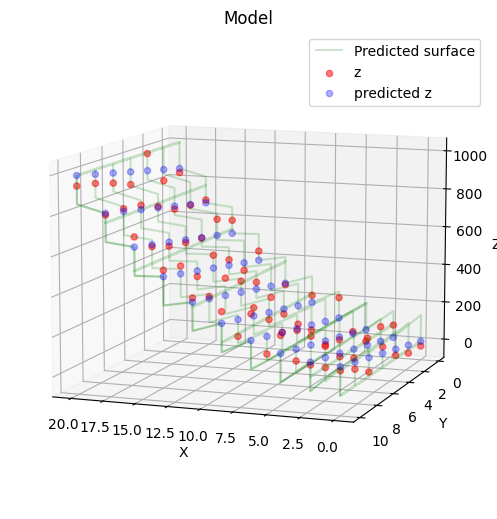

In [676]:
submodel = regression(*(Y, X**2 ), show_summary=True, plot=True, use_constant=True) 

#### Porovnáme celkovú MSE, SE a r^2 pre model B6, B4 a zvolený submodel

In [677]:

labels = ['submodel', 'modelB6', 'modelB4']
models = [submodel, modelB6, modelB4]
for i in range(0,3):
    print(f'{labels[i]}: {models[i].mse_total, np.sum(models[i].resid), models[i].rsquared}')

submodel: (85901.96043745341, -4.243361217959318e-11, 0.9669241584196224)
modelB6: (85901.96043745341, 3.61524143954739e-11, 0.9698382643056537)
modelB4: (85901.96043745341, -4.064304448547773e-11, 0.9685971204437828)


### B) Odhady regresních parametrov a ich 95% intervaly spolahlivosti

In [678]:
labels = ['b1','b2','b3']
conf_int = submodel.conf_int(alpha=alpha)
params = zip(labels, submodel.params, conf_int)
for i in params:
    name, val, interval = i
    print(f'{name}: {val}, {interval}')

b1: -0.112101654189658, [-27.11093664  26.88673334]
b2: 14.182435348708022, [10.31038809 18.05448261]
b3: 2.1278657672850407, [2.03056046 2.22517107]


### C) Rozptyl Z

In [679]:

sum = np.sum(submodel.resid**2)
rozptyl = sum/(submodel.df_resid)
print(rozptyl)

2926.0939523319685


### D) Test na nulovost parametrov
H: (B1,B3) = (0,0)

In [680]:
F = np.column_stack((Y, X**2))
F = sm.add_constant(F)
H = np.dot(np.transpose(F),F)

b1 = submodel.params[0]
b2 = submodel.params[1]
b3 = submodel.params[2]
print(b1,b2)
z = ((H[0][0]*(b1**2))+H[0][1]*H[1][0]*(b1*b2)+H[1][1]*(b2**2))/(2*rozptyl) # n(b1**2)+2(sum y_n**2)b1*b2+(sum Yn**2)*(b2**2)*(1/2s**2)

#z = (submodel.nobs*(b1)**2)+2*H[0][1]*(b1*b3)+(H[1][0]**2)*(b3**2)/(2*rozptyl)
F = sp.f.ppf(1-alpha, submodel.df_model, submodel.nobs-2)
print(f'Testovacie kriterium z:{z}')
print(f'Doplnok kritickeho oboru: {[0, F]}')
print(f'H zamietame: {z>F or z < 0}')

-0.112101654189658 14.182435348708022
Testovacie kriterium z:53.59321992523344
Doplnok kritickeho oboru: [0, 3.1316719710508436]
H zamietame: True


### E) Rovnost parametrov 
H: B1 = B3

In [681]:
s = math.sqrt(rozptyl)
F = np.column_stack((Y,X**2))
F = sm.add_constant(F)
V = np.linalg.inv(np.dot(np.transpose(F),F))
t = (b1-b3)/(s*V[0][0])
T_alpha = sp.t.ppf(1-alpha/2, submodel.df_resid)
print(f'Testovacie kriterium z:{t}')
print(f'Doplnok kritickeho oboru: {[-T_alpha, T_alpha]}')
print(f'H zamietame: {t >= T_alpha or t <= T_alpha}')

# druha H: B3 = B1
t = (b3-b1)/(s*V[2][2])
T_alpha = sp.t.ppf(1-alpha/2, submodel.df_resid)
print(f'Testovacie kriterium z:{t}')
print(f'Doplnok kritickeho oboru: {[-T_alpha, T_alpha]}')
print(f'H zamietame: {t >= T_alpha or t <= T_alpha}')

# ALEBO tretia  H: (B1, B3) = (B3,B1)
z = ((H[0][0]*((b1-b3)**2))+H[0][2]*H[1][2]*(b1*b3)+H[2][2]*((b3*b1)**2))/(2*rozptyl)
F = sp.f.ppf(1-alpha, submodel.df_model, submodel.nobs-2)
print(f'Testovacie kriterium z:{z}')
print(f'Doplnok kritickeho oboru: {[0, F]}')
print(f'H zamietame: {z>F or z < 0}')

Testovacie kriterium z:-0.6622477554980314
Doplnok kritickeho oboru: [-1.9960083534755055, 1.9960083534755055]
H zamietame: True
Testovacie kriterium z:50984.42039755873
Doplnok kritickeho oboru: [-1.9960083534755055, 1.9960083534755055]
H zamietame: True
Testovacie kriterium z:-19758.61375140792
Doplnok kritickeho oboru: [0, 3.1316719710508436]
H zamietame: True
